# Exercise 1

## Physics 7810
## Due March 2, 2020

## E1.1 - Metropolis Monte Carlo simulation of the Lennard-Jones system

Write a Python program to simulate the three-dimensional (3D) Lennard-Jones (LJ) system in the $NVT$ ensemble using the Metropolis Monte Carlo (MC) algorithm. As in Homework 2, use periodic boundary conditions, and assume that the $N$ particles in the simulation are initially placed in a cubic box of sidelength $L$ (so the volume $V = L^3$).

You can re-use much of the molecular dynamics (MD) simulation code you wrote to simulate the 3D LJ system. The main difference is that the MD integration step for updating particle positions and velocities is replaced by an MC 'sweep' that updates particle positions through a sequence of $N$ small random displacements of randomly selected particles. There's no need to define the particle velocities in an MC simulation, as only particle configurations are sampled.

Note also that only changes in energy (not forces) are needed for calculating the Metropolis acceptance probability,

$$
P_\mathrm{acc}(o \to n) = \min \left[1, e^{- \beta \Delta U} \right].
$$

Thus, you could in principle save time by only computing the pair potential, not the pair forces. However, the pair forces are needed for calculating the pressure (via the virial), so keep the pair force calculation in your pair interaction routine.

Generate random trial moves for particles according to the procedure described in Section 3.3 in Frenkel and Smit and Section 4.4 in Allen and Tildesley. This involves generating a trial displacement of a selected particle uniformly within a cube of sidelength $\Delta$ centered on the particle. The parameter $\Delta$ is a free parameter that can be adjusted to maximize the sampling efficiency of the MC procedure. We'll discuss how to do this systematically later (see Section 3.3 in Frenkel and Smit, for example), but for now just adjust $\Delta$ so that the average acceptance probability is between $0.2$ and $0.5$ (note that the value of $\Delta$ needed to achieve this will depend on density and temperature).

Is it obvious that this procedure for generating trial displacements satisfies detailed balance?

Use your simulation code to reproduce the equation of state $\langle P(\rho) \rangle$ shown on the right side of Figure 3.5 in Frenkel and Smit, using the procedure described in Section 3.4 of Frenkel and Smit (cutoff $r_c$ equal to half the box length, tail corrections for the potential energy and pressure, etc.). Use Equation 3.4.1 to calculate the pressure from the virial (Equation 3.4.2). This will require accumulating the virial within your pair interaction routine.

Because you're using Python and an inefficient neighbor search method, you may need to simulate systems that are significantly smaller than the system studied by Frenkel and Smit ($N = 500$). Also, you'll need to monitor the equilibration of the system to determine at what point the potential energy and pressure have stabilized, with small fluctuations around a average value. Do this by plotting $U(n)$ and $P(n)$ as a function of the number of MC sweeps $n$. The average potential energy per particle $\langle U / N \rangle$ and the average pressure $\langle P \rangle$ should be calculated as averages over the latter part of the simulation, not including the initial approach to equilibrium.

In [1]:
import sys
sys.path.insert(1, '../')  # so the system can locate the library folder
from CompPhysLib.MD_NVE import *

In [5]:
param = Initialization('Exercise_01.yml')
MC = MonteCarlo('Exercise_01.yml')
MC.metropolis_algrtm(MC.coords)

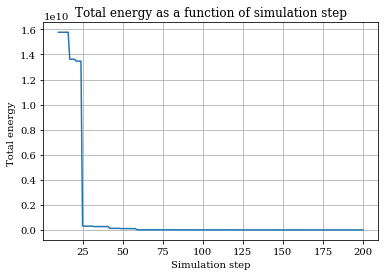

In [7]:
TA = TrajAnalysis('Exercise_01.yml', 'Exercise_01_traj.yml')
TA.plot_2d(TA.E_total, 'Total energy', 10)

In [4]:
TA.N_steps

200